In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
import keras 
from keras.models import Sequential 
from keras.layers import InputLayer 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.constraints import maxnorm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Using TensorFlow backend.


In [4]:
data = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.SeniorCitizen.replace([0, 1], ["No", "Yes"], inplace= True)
data.TotalCharges.replace([" "], ["0"], inplace= True)
data.TotalCharges = data.TotalCharges.astype(float)
data.drop("customerID", axis= 1, inplace= True) 
data.Churn.replace(["Yes", "No"], [1, 0], inplace= True)

In [6]:
data = pd.get_dummies(data)


In [7]:
X = data.drop("Churn", axis= 1)
y = data.Churn

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [14]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=200,
                              random_state=42)
rf.fit(X_train, y_train) 
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.999
Test set accuracy:  0.796


In [ ]:
rf_predictions = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)

In [13]:
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[949  87]
 [198 175]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409

0.7977288857345636


In [15]:
rf_predictions = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)


In [16]:
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[945  91]
 [196 177]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

0.7963094393186657


In [17]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
2,TotalCharges,0.159866
0,tenure,0.140082
1,MonthlyCharges,0.136379
37,Contract_Month-to-month,0.051542
19,OnlineSecurity_No,0.031220


In [18]:
model = Sequential()
model.add(Dense(64, input_dim=46, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(8, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=8)

Train on 5634 samples, validate on 1409 samples
Epoch 1/20
5634/5634 [==============================] - 3s 476us/step - loss: 0.5782 - accuracy: 0.7348 - val_loss: 0.5779 - val_accuracy: 0.7353
Epoch 2/20
5634/5634 [==============================] - 3s 472us/step - loss: 0.5801 - accuracy: 0.7371 - val_loss: 0.5779 - val_accuracy: 0.7353
Epoch 3/20
5634/5634 [==============================] - 3s 505us/step - loss: 0.5836 - accuracy: 0.7387 - val_loss: 0.5778 - val_accuracy: 0.7353
Epoch 4/20
5634/5634 [==============================] - 3s 482us/step - loss: 0.5726 - accuracy: 0.7403 - val_loss: 0.5779 - val_accuracy: 0.7353
Epoch 5/20
5634/5634 [==============================] - 3s 459us/step - loss: 0.5781 - accuracy: 0.7451 - val_loss: 0.5375 - val_accuracy: 0.7665
Epoch 6/20
5634/5634 [==============================] - 3s 466us/step - loss: 0.5926 - accuracy: 0.7519 - val_loss: 0.5284 - val_accuracy: 0.7750
Epoch 7/20
5634/5634 [==============================] - 3s 476us/step - loss

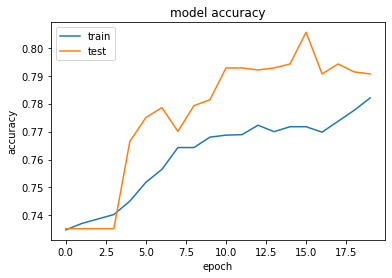

In [22]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()